# Algoritmo analítico para árboles sintácticos

Los algoritmos analíticos, a diferencia de los generativos, se basan en separar las expresiones por sus componentes, utilizando el concepto de esquema. Aquí implementamos un algoritmo simple para crear un árbol de análisis de expresiones de la forma: 

$$(A) \circ (B)$$

O de la forma:

$$¬(A)$$

Donde $A$ y $B$ son expresiones de la forma $(p\circ q)$ y $\circ es cualquier operador binario. Para construir este análisis necesitaremos algunas herramientas.

### Utilidades

En un archivo de utilidades que llamamos <i>utils.py</i> tenemos diferentes funciones y herramientas que nos servirán para construir el algoritmo. 

Para llamar a una función de este archivo de utilidades necesitamos indicar la siguiente sintaxis:

```python
from nombre_de_archivo import nombre_funcion
```

En este caso, indicamos que queremos la función `nombre_de_función` del programa o script `nombre_de_archivo`. Por ejemplo, aquí usaremos tres utilidades:

* `MainConective` que es una función que separa la expresión en el conectivo y su rango.
* `Node` que nos servirá para crear los nodos del árbol
* `print_tree` que es una función que nos servirá para imprimir y visualizar el árbol.

Todas estas herramientas están en el archivo de <i>utils.py</i>, por lo que los llamamos desde `utils`.

In [1]:
#Llamamos MainConective desde utils
from utils import MainConective
#Llamamos Node desde utils
from utils import Node
#Llamamos print_tree desde utils
from utils import print_tree

## Algoritmo analítico

Para el algoritmo analítico construiremos un árbol a partir de las exprsiones. Como hemos visto, el algoritmo va a revisar:

1. Si la expresión es atómica, acaba el algoritmo con un nodo hoja correspondiente a la expresión.
2. Si el conectivo es unario, crea un nodo con el operador y otro con el rango.
3. Si es binario, crea un nodo con el operador y otros con los rangos izquierdo y derecho.

El algoritmo se aplica recursivamente. La entrada es una expresión y la salida será el árbol de análisi construido por esta expresión.

In [2]:
def Analysis(E):
    """
    Algoritmo analítico para generar árboles sintácticos.
    
    Arguments
    ---------
    E : str
        Expresión a analizar
        
    Returns
    -------
        Árbol sintáctico de la expresión
    """
    #Si la expresión es atómica...
    if len(E) == 1:
        #...se crea el nodo hoja y se acaba el proceso
        return Node(node=E)
    #En otro caso
    else:
        #Aplicamos la función MainConnective que nos dará el conectivo y rango
        conective = MainConective(E)
        #Si el conectivo es unario...
        if conective[0] == '¬':
            #...guardamos el conectivo
            rank = conective[1]
            #y guardamos el rango aplicando el algoritmo recursivamente
            child = Analysis(rank)
            
            #Finalmente, creamos los nodos del árbol
            return Node(node=E, nodeOP=conective[0], nodeR=child)
        #Si el nodo es binario...
        else:
            #...guardamos rango izquierdo y derecho
            rankL = conective[1]
            rankR = conective[2]
            #guardamos el rango izquierdo aplicando el algoritmo recursivamente
            childL = Analysis(rankL)
            #guardamos el rango derecho aplicando el algoritmo recursivamente
            childR = Analysis(rankR)
            
            #Finalmente, creamos los nodos del árbol
            return Node(node=E, nodeOP=conective[0], nodeL=childL, nodeR=childR)

### Aplicación del algoritmo

Ya definido el algoritmo podemos pasar a probarlo con diferentes expresiones. El algoritmo nos regresará un objeto árbol el cuál visualizaremos con la función `print_tree` que hemos llamdo anteriormente.

In [3]:
#Expresión de implicación a analizar
expresion = 'p->q'
#Aplicamos el algoritmo y guardamos el resultado en la variable tree
tree = Analysis(expresion)
#Imprimimos el árbol para visualizarlo
print_tree(tree)

p->q
	operador: ->
	rango L: p
	rango R: q


Podemos aplicarlo a expresiones más complejas.

In [4]:
#Expresión a analizar
expresion = '(¬(pvs))->(q^r)'
#Aplicamos el algoritmo y guardamos el resultado en la variable tree
tree = Analysis(expresion)
#Imprimimos el árbol para visualizarlo
print_tree(tree)

(¬(pvs))->(q^r)
	operador: ->
	rango L: ¬(pvs)
		operador: ¬
		rango: pvs
			operador: v
			rango L: p
			rango R: s
	rango R: q^r
		operador: ^
		rango L: q
		rango R: r


### Visualización gráfica del árbol

Los lenguajes de programación nos permiten visualizar imágenes de las estructuras de datos que definimos. En particular, nos permiten visualizar árboles. Sin embargo, esto suele requerrir de librerías externas, que se han realizado por otras personas o instituciones. 

Aquí utilizamos una función `draw_tree` que llamamos desde `utils` pero cabe señalar que esta función utiliza otras funciones externas, en particular de librerías como `networkx` (https://networkx.org/) y `matplotlib` (https://matplotlib.org/). Si éstas librerías no están instalada la función no servirá y nos arrojará un error.

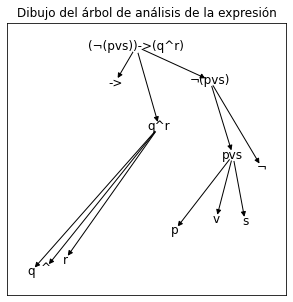

In [7]:
#Llamamos función para visualizar el árbol
from utils import draw_tree

#Dibujamos el árbol
draw_tree(tree)

Podemos visualizar otros árboles haciendo una composición de las funciones que hemos programado.

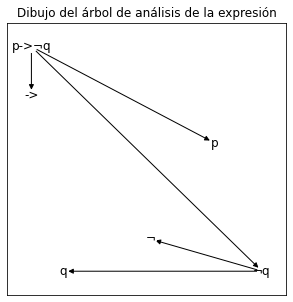

In [6]:
#Dibujamos el árbol para una expresión 
#que analizamos previamente
draw_tree(Analysis('p->¬q'))